In [1]:
# Standard imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Other
from scipy.stats import pearsonr
import matplotlib.gridspec as gridspec
import pickle

# For plotting inline
%matplotlib inline
plt.ion()

In [2]:
# Import suftware (use development copy)
import sys
sys.path.append('../../suftware')

import suftware as sw

In [3]:
# Set default plotting style
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rc('text', usetex=True)
fontsize=7
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['hatch.linewidth'] = 1
mpl.rcParams['hatch.color'] = 'black'

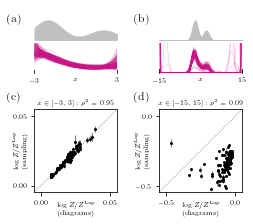

In [5]:
np.random.seed(0)

fig = plt.figure(figsize=[3.4,3])
gs1 = gridspec.GridSpec(2, 2, hspace=.1, wspace=.5, left=0.12, right=0.97, top=.99, bottom=.70)
gs2 = gridspec.GridSpec(1, 2, hspace=.1, wspace=.5, left=0.12, right=0.97, top=.55, bottom=.13)

files = [
    'N_100/bbox_small',
    'N_100/bbox_large'
]
lims = [
    (-0.005,.055),
    (-.55,.05)
]
ticks = [
    (0,.05),
    (-.5,.0)
]

sample_files = [
    'N_100/Q_samples_N100_small_bbox_fixed_l',
    'N_100/Q_samples_N100_large_bbox_fixed_l'
]

R_files = [
    'N_100/R_small_bbox',
    'N_100/R_large_bbox'
]

#Q_lim=[.6,.4]

density_names = ['DoubleGaussianZoom', 'DoubleGaussian']

for i, name in enumerate(density_names):
    
    # Get Q_true stuff
    #s = bbox_stuff(bbox)
    #xs = s.xs
    #Q_true = s.Q_true
    #h = s.h
    
    density = sw.SimulatedDensity(name)
    bbox = density.bounding_box
    G = 100
    L = bbox[1]-bbox[0]
    h = L/G
    xs = np.linspace(density.xmin+h/2, density.xmax-h/2, G)
    Q_true = density.evaluate(xs)
    ymax = 1.5*max(Q_true)
    
    #
    # Middle plot 2
    #
    ax = plt.subplot(gs1[0, i])
    
    # Plot samples at fixed ell
    ax.fill_between(xs, Q_true, color='silver')
    ax.axhline(0,linestyle='--',color='k',linewidth=.5)
    
    # Format axes
    ax.set_xlim(bbox)
    ax.set_ylim([0,ymax])
    ax.set_yticks([])
    ax.set_xticks([])
    
    ybound = .1
    ax.spines['top'].set_visible(False) 
    ax.spines['bottom'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.spines['left'].set_visible(False) 
    
    
    # Plot samples at fixed ell
    ax = plt.subplot(gs1[1, i])
    with open(sample_files[i],'rb') as f:
        Qs = pickle.load(f, encoding='latin1')
    Qs /= np.sum(h*Qs, axis=0)[np.newaxis,:]
    num_samples=200
    indices = np.random.choice(Qs.shape[1],num_samples)
    ax.plot(xs, Qs[:,indices], color='mediumvioletred', linewidth=.5, alpha=.3, zorder=-1000)
    ax.axhline(0,linestyle='--',color='k',linewidth=.5)
    
    # Format axes
    ax.set_xlim(bbox)
    ax.set_ylim([0,ymax])
    ax.set_yticks([])
    ax.set_xticks([bbox[0],bbox[1]])
    ax.set_xlabel('$x$', labelpad=-7)
    ax.tick_params(length=0)
    
    ybound = .05
    ax.spines['top'].set_visible(False) 
    ax.spines['bottom'].set_visible(False) 
    ax.spines['right'].set_bounds(0,ybound) 
    ax.spines['left'].set_bounds(0,ybound) 
    
    #
    # Lower plot
    #
    ax = plt.subplot(gs2[0, i], aspect='equal')

    # Load Feynman vs importanc sampling data
    p = pickle.load(open(files[i],'rb'), encoding='latin1')
    feyn = p[:,0]
    imp = p[:,1]
    #print('Number of data points in (%s): %d'%(['d','h'][i],len(feyn)))
    d_imp = p[:,2]/np.sqrt(1E5)
    signal_to_noise = np.var(feyn)/np.var(feyn-imp)
    ax.errorbar(feyn, imp, d_imp, color='k', marker='o', markersize=3, markeredgewidth=0, 
                linestyle='none', elinewidth=0.5, alpha=1)
    lim = lims[i]
    rho, pval = pearsonr(feyn,imp)
    
    # Format axes
    ax.set_xlim(lim)
    ax.set_ylim(lim)
    ax.set_xticks(ticks[i])
    ax.set_yticks(ticks[i])
    ax.set_ylabel('$\log Z/Z^\mathrm{Lap}$\n(sampling)', labelpad=-15)
    ax.set_xlabel('$\log Z/Z^\mathrm{Lap}$\n(diagrams)', labelpad=-5)
    ax.plot(lim,lim,'--',zorder=-10, color='gray', linewidth=.5)
    ax.set_title('$x \in [%d,%d]: \\rho^2$ = %0.2f'%(bbox[0], bbox[1], rho**2), fontsize=fontsize, y=.98)
    
# Label figure
l = .01
r = .53
t = .98
b = .62
label_fontsize=12
plt.figtext(l, t, '(a)', horizontalalignment='left', verticalalignment='top', fontsize=label_fontsize)
plt.figtext(l, b, '(c)', horizontalalignment='left', verticalalignment='top', fontsize=label_fontsize)
plt.figtext(r, t, '(b)', horizontalalignment='left', verticalalignment='top', fontsize=label_fontsize)
plt.figtext(r, b, '(d)', horizontalalignment='left', verticalalignment='top', fontsize=label_fontsize)
    
fig.savefig('figures/fig_S2.pdf')
    
